# Optimization

## 06.01 Optimization

Given a function $f : \mathbb{R}^n \rightarrow \mathbb{R}$ and set $S \subset \mathbb{R}^n$ find $x^* \in S$ such that $f(x^*) \leq f(x)$ for all $x \in S$.
* Fully general, maximum of $f$ is the minimum of $-f$.

$f$ is referred to as **objective function**
* differentiable
* linear or nonlinear

$S$ is referred to as **constraint**
* system of equations or inequalities
* linear or nonlinear
* if $S = \mathbb{R}^n$ then problem is **unconstrained**

#### Example Problem
Minimize the surface area of cylinder subject to constraint on volume.
$$
\min_{x_1, x_2} f(x_1, x_2) = 2 \pi x_1 (x_1 + x_2) \\
\text{subject to} \quad g(x_1, x_2) = \pi x_1^2 x_2 - V = 0 \\
$$
where
* $x_1, x_2$ are the radius and height of cylinder
* $V$ is volume of cylinder

## 06.02 Existence, Uniqueness, and Conditioning

#### Existence
If $f$ is continuous on *closed* and *bounded* set $S \in \mathbb{R}^n$ then $f$ has global minimum on $S$.

If $f$ is **coercive** (defined below) on *closed* and *unbounded* set $S \in \mathbb{R}^n$ then $f$ has global minimum on $S$.
$$
\lim_{||x|| \rightarrow \infty} f(x) = + \infty
$$

Examples
* $f(x) = x^2$ is coercive, since set is unbounded and goes to $+ \infty$ from both directions
* $f(x) = x^3$ is not coercive, since it goes to $+ \infty$ and $- \infty$ depending on the sign of $x$

No other fully general statements can be made about existence of minimum.

#### Uniqueness
Set $S \in \mathbb{R}^n$ is **convex** if the set **fully** contains a line segment between any two points in the set.

Function $f: S \in \mathbb{R}^n \rightarrow \mathbb{R}$ is **convex** if its graph along any line segment in $S$ lies on or below the chord connecting function values at endpoints of segment.

Any local minimum of convex function $f$ on convex set $S \in \mathbb{R}^n$ is global minimum of $f$ on $S$.
* The global minimum is unique when $f$ is strictly convex.

#### Conditioning
In comparison to solving nonlinear equations, minima can only be computed to half precision.

## 06.03 Optimality Conditions

#### First-Order
Find the minimum by solving nonlinear system with $\nabla f(x) = 0$ where ith component of the gradient given by $\partial f(x) / \partial x_i$.
* Values of $x$ where $\nabla f(x) = 0$ referred to as **critical points**.
* Critical points can be:
  * minimum
  * maximum
  * saddle points

#### Second-Order
Distinguish critical points by using symmetric **Hessian matrix** $H_f(x)$ defined as:
$$
{H_f(x)}_{ij} = \frac{\partial^2 f(x)}{\partial x_i \partial x_j}
$$
* Hessian (second order partial derivative) related to Jacobian (first order partial derivatives) by: 
$$
H(f(x)) = J(\nabla f(x))^T
$$

At critical point $x^*$ if $H(f(x^*))$ is:
* positive definite, then $x^*$ is minimum of $f$
* negative definite, then $x^*$ is maximum of $f$
* indefinite, then $x^*$ is saddle point of $f$
* singular, then various outcomes are possible

#### Constrained Optimality
Lagrangian function
$$
\mathcal{L}(x, \lambda) = f(x) + \lambda^T g(x)
$$

Gradient given by
$$
\mathcal{L}(x, \lambda) =
\begin{bmatrix}
\nabla f(x) + J_g^T (x) \lambda \\
g(x) \\
\end{bmatrix}
$$

Hessian (symmetric) given by
$$
H_{\mathcal{L}}(x, \lambda) =
\begin{bmatrix}
B(x, \lambda) & J_g^T(x) \\
J_g (x) & 0 \\
\end{bmatrix}
$$
where
$$
B(x, \lambda) = H_f(x) + \sum_{i=1}^{m} \lambda_i H_{g_i} (x)
$$

## 06.04 One-Dimensional Optimization

#### Unimodal
Real-valued function $f$ is **unimodal** on interval $[a, b]$ if there is a unique $x^* \in [a, b]$ such that:
* $f(x^*)$ is minimum of $f$ on $[a, b]$
* $f$ is strictly decreasing for $x \leq x^*$
* $f$ is strictly increasing for $x^* \leq x$

For optimization problems, unimodality enables discarding portion of interval analogous to interval bisection for nonlinear equations.

#### Golden Section Search
Let $x_1$ and $x_2$ be two points on the interval $[a, b]$ and assume that $f$ is unimodal.

* If $f(x_1) < f(x_2)$, then the minimum is not in interval $[x_2, b]$.
* If $f(x_1) > f(x_2)$, then the minimum is not in interval $[a, x_1]$.

How to choose the points $x_1$ and $x_2$?
* Choose positions based on $\tau$ and $1 - \tau$ where $\tau^2 = 1 - \tau$ or $\tau \approx 0.618$ and $1 - \tau \approx 0.382$.
* Positions $\tau$ and $1 - \tau$ known as **golden section search**.

Convergence is linear ($r = 1, C \approx 0.618$) which is slow.

#### Parabolic Interpolation
Fit quadratic polynomial to three function values.
* Analogous to secant method, but with higher order polynomial instead of line.

Convergence is superlinear ($r \approx 1.324$).

#### Newton's Method
Approximate the function using Taylor series:
$$
f(x + h) \approx f(x) + f'(x) h + \frac{f''(x)}{2} h^2
$$

Differentiating by $h$, the minimum is given by:
$$
h = - \frac{f'(x)}{f''(x)}
$$

Suggests the following method:
1. Start with some initial guess $x_0$.
2. Compute $x_{k+1} = x_k - \frac{f'(x)}{f''(x)}$.
3. Repeat the previous step until some stopping criteria is reached.

Convergence rate is quadratic ($r = 2$).
* The initial guess, $x_0$ must be close to minimum in order to converge.

#### Safeguarded Methods
As with nonlinear equations, slow-but-sure methods can be combined with fast-but-risky.
* Popular combination for library routines is golden section search with parabolic interpolation.
* Newton's Method requires derivatives and, as a result is not as popular.

Find the minimum of $f(x) = 0.5 - x e^{-x^2}$ over the interval $[0, 2]$ using golden section search.

In [1]:
import math
import numpy as np
import scipy.optimize as opt

def goldensection(fx, a, b, tol=np.finfo('d').eps):
    """
    Find the minimum of f on interval [a, b] using Golden Section search.
    """
    tau = (math.sqrt(5) - 1.) / 2.
    x1, x2 = a + (1. - tau) * (b - a), a + tau * (b - a)
    fx1, fx2 = fx(x1), fx(x2)
    
    while (b - a) > tol:
        if fx1 < fx2:
            b = x2
            # Treat x1 as the new x2.
            x2, fx2 = x1, fx1
            # Compute new x1.
            x1 = a + (1. - tau) * (b - a)
            fx1 = fx(x1)
        else:
            a = x1
            # Treat x2 as the new x1.
            x1, fx1 = x2, fx2
            # Compute new x2.
            x2 = a + tau * (b - a)
            fx2 = fx(x2)
    
    return x1, fx1


def fx(x):
    return 0.5 - x * math.exp(-1. * x*x)


tol = np.finfo('d').eps

a, b = 0., 2.
minx, minfx = goldensection(fx, a, b, tol=tol)
print("minx:  ", minx)
print("minfx: ", minfx)

# Compare to the value returned from scipy.optimize.minimize_scalar.
res = opt.minimize_scalar(fx, (a, b), method='golden', tol=tol)
np.testing.assert_almost_equal(minx, res.x)

minx:   0.7071067871818779
minfx:  0.07111805751964656


Find the minimum of $f(x) = 0.5 - x e^{-x^2}$ over the interval $[0, 2]$ using Newton's method.

In [2]:
import math
import numpy as np
import scipy.optimize as opt

def newton1dmin(fx, dfx, ddfx, a, b, tol=np.finfo('d').eps):
    """
    Find the minimum of f on interval [a, b] using Newton's method.
    """
    # NOTE(mmorais): Newton's method very sensitive to x0.
    # Initialized x0 to random value in [a, b], but the solution
    # will frequently fail to converge.  Eventually settled on 
    # midpoint of the interval which converges for this problem.
    #x0 = a + np.random.random() * (b - a)
    x0 = a + (b - a) / 2.
    xk, fxk = x0, fx(x0)
    fxk_prev = fxk + 1.

    # Stop iteration when there is no change in fxk.
    while abs(fxk - fxk_prev) > tol:
        hk = -1. * dfx(xk) / ddfx(xk)
        xk = xk + hk
        fxk, fxk_prev = fx(xk), fxk

    return xk, fxk


def fx(x):
    return 0.5 - x * math.exp(-1. * x*x)

def dfx(x):
    ex2 = math.exp(-1. * x*x)
    return 2. * x*x * ex2 - ex2

def ddfx(x):
    ex2 = math.exp(-1. * x*x)
    return 6. * x * ex2 - 4. * math.pow(x, 3) * ex2


tol = np.finfo('d').eps

a, b = 0., 2.
minx, minfx = newton1dmin(fx, dfx, ddfx, a, b, tol=tol)
print("minx:  ", minx)
print("minfx: ", minfx)

# Compare to the value returned from scipy.optimize.minimize_scalar.
res = opt.minimize_scalar(fx, (a, b), tol=tol)
np.testing.assert_almost_equal(minx, res.x)

minx:   0.7071067811865475
minfx:  0.07111805751964656


Plot $f(x) = 0.5 - x e^{-x^2}$ and $f'(x)/f''(x)$ over the interval $[0, 2]$ to see why Newton's method is so senstive to initial guess, $x_0$.

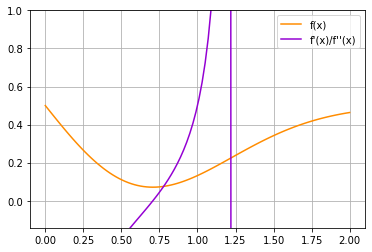

In [3]:
import warnings

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

warnings.simplefilter('ignore')

x = np.linspace(a, b, num=100)
vfx, vdfx, vddfx = np.vectorize(fx), np.vectorize(dfx), np.vectorize(ddfx)

plt.plot(x, vfx(x), c='darkorange', label='f(x)')
plt.plot(x, vdfx(x)/vddfx(x), c='darkviolet', label="f'(x)/f''(x)")
plt.ylim(-2.*np.min(vfx(x)), 2.*np.max(vfx(x)))
plt.grid()
plt.legend()
plt.show()

## 06.05 Unconstrained Optimization

#### Direct Search
Function values are only used to compare with each other.  Find minimum of $f: \mathbb{R}^n \rightarrow \mathbb{R}$.

Nelder-Mead algorithm:
1. Pick $n + 1$ starting points referred to as **simplex** in $\mathbb{R}^n$.
  * Points must not be colinear.
2. Replace the point having the highest function value with a new point which is located somewhere along a line that runs through the centroid of the other $n$ points.
  * Hyperparameters of the algorithm define how far along the line.
3. Repeat the previous step until some stopping criteria is reached.

Attractive because it can be easily parallelized, but expensive to compute for large $n$.

#### Steepest Descent
At any point $x$, then negative gradient $-\nabla f(x)$ points in the direction of the steepest descent.

Suggests the following method:
1. Start with some initial guess $x_0$.
2. Compute $s_k = -\nabla f(x_k)$
3. Perform line search: find $\alpha_k$ where $x_k + \alpha_k s_k$ is minimized.
  * Use 1d minimization: golden section search or parabolic interpolation.
4. Compute $x_{k+1} = x_k + \alpha_k s_k$.
5. Repeat from step 2 until some stopping criteria is reached.

The line search step will result in characteristic zig-zag pattern when minimizing a function in 2d.

Method is reliable (provided gradient is nonzero), but slow ($r = 1$)

Find the minimum of $f(x) = 0.5 x_1^2 + 2.5 x_2^2$ having gradient $\nabla f(x) = [x_1 \quad 5 x_2]^T$ using Steepest Descent.

In [4]:
import numpy as np
import scipy.optimize as opt

def steepestdescent(fx, gradfx, x0, tol=np.finfo('d').eps):
    """
    Find the minimum of the scalar field f using Steepest Descent method.
    """
    xk, sk = x0, gradfx(x0)
    steps = []
    
    # Stop iteration when gradient is near zero.
    while np.linalg.norm(sk) > tol:
        sk = -1. * gradfx(xk)
        # Perform line search to find \alpha_k.
        falpha = lambda alpha: fx(xk + alpha * sk)
        res = opt.minimize_scalar(falpha, tol=tol)
        alphak = res.x
        # Update xk.
        xk = xk + alphak * sk
        steps.append(xk)  # For debugging.

    return xk, steps


def fx(xk):
    return 0.5 * xk[0]*xk[0] + 2.5 * xk[1]*xk[1]

def gradfx(xk):
    return np.array([xk[0], 5. * xk[1]])


tol = math.sqrt(np.finfo('d').eps)

x0 = np.array([5, 1], dtype='d')
minx, steps = steepestdescent(fx, gradfx, x0, tol=tol)
print("minx: ", minx)

# Compare to the value returned from scipy.optimize.minimize.
res = opt.minimize(fx, x0, tol=tol)
np.testing.assert_almost_equal(minx, res.x)

minx:  [ 5.22776162e-09 -1.04555256e-09]


Plot $f(x) = 0.5 x_1^2 + 2.5 x_2^2$ along with the values of $x_k$ at each step of the algorithm.

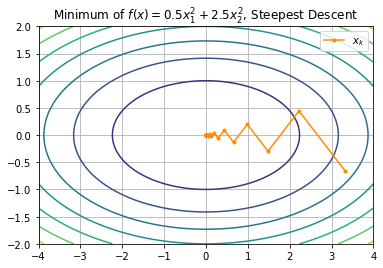

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

xgrid, ygrid = np.meshgrid(np.linspace(-4,4,100), np.linspace(-2,2,100))
fgrid = fx(np.array([xgrid, ygrid]))
plt.contour(xgrid, ygrid, fgrid)
plt.plot([xk[0] for xk in steps], [xk[1] for xk in steps],
         marker='.', c='darkorange', label='$x_k$')
plt.title('Minimum of $f(x) = 0.5 x_1^2 + 2.5 x_2^2$, Steepest Descent')
plt.grid()
plt.legend()
plt.show()

## 06.06 Newton's Method

Broader view of minimization is to incorporate second-order effects using Hessian matrix $H_f(x)$ given by:
$$
{H_f(x)}_{ij} = \frac{\partial^2 f(x)}{\partial x_i \partial x_j}
$$

1. Start with some initial guess $x_0$.
2. Solve $H_f(x_k) s_k = -\nabla f(x_k)$ for $s_k$.
3. Compute $x_{k+1} = x_k + s_k$.
3. Repeat from step 2 until some stopping criteria is reached.

In comparison to Steepest Descent, no line search is necessary since the second derivative $H_f(x)$ provides the length of the step.
* Convergence is very rapid in comparison to using only first derivative $\nabla f(x_k)$ which provides direction but not length.

Convergence rate is quadratic ($r = 2$).
* The initial guess, $x_0$ must be close to minimum in order to converge.


Find the minimum of $f(x) = 0.5 x_1^2 + 2.5 x_2^2$ using Newton's method.

The gradient $\nabla f(x)$ is given by the first-order partial derivatives:
$$
\nabla f(x) = 
\begin{bmatrix}
\frac{\partial f(x)}{\partial x_1} \\ 
\frac{\partial f(x)}{\partial x_2}
\end{bmatrix} =
\begin{bmatrix}
x_1 \\ 
5 x_2
\end{bmatrix}
$$

The Hessian $H_f (x)$ is given by the second-order partial derivatives:
$$
H_f (x) = 
\begin{bmatrix}
\frac{\partial^2 f(x)}{\partial x_1^2} & \frac{\partial^2 f(x)}{\partial x_1 \partial  x_2} \\ 
\frac{\partial^2 f(x)}{\partial x_1 \partial x_2} & \frac{\partial^2 f(x)}{\partial x_2^2}
\end{bmatrix} =
\begin{bmatrix}
1 & 0 \\ 
0 & 5
\end{bmatrix}
$$

In [6]:
import numpy as np
import scipy.optimize as opt

def newtonmin(gradfx, hessfx, x0, tol=np.finfo('d').eps):
    """
    Find the minimum of the scalar field f using Newton's method.
    """
    xk, gradfxk = x0, gradfx(x0)
    steps = []
    
    # Stop iteration when gradient is near zero.
    while np.linalg.norm(gradfxk) > tol:
        gradfxk = gradfx(xk)
        # Solve H_f(xk) sk = - grad(xk) for sk.
        sk = np.linalg.solve(hessfx(xk), -1. * gradfxk)
        # Update xk.
        xk = xk + sk
        steps.append(xk)  # For debugging.

    return xk, steps


def fx(xk):
    return 0.5 * xk[0]*xk[0] + 2.5 * xk[1]*xk[1]

def gradfx(xk):
    return np.array([xk[0], 5. * xk[1]])

def hessfx(xk):
    return np.array([1., 0, 0., 5.]).reshape(2,2)


tol = math.sqrt(np.finfo('d').eps)

x0 = np.array([5, 1], dtype='d')
minx, steps = newtonmin(gradfx, hessfx, x0, tol=tol)
print("minx: ", minx)
# NOTE(mmorais): Observe that Newton's method requires 2 steps.
print("steps: ", steps)

# Compare to the value returned from scipy.optimize.minimize.
res = opt.minimize(fx, x0, tol=tol)
np.testing.assert_almost_equal(minx, res.x)

minx:  [0. 0.]
steps:  [array([0., 0.]), array([0., 0.])]


## 06.07 Quasi-Netwon Methods

## 06.08 Nonlinear Least Squares

## 06.09 Constrained Optimization

## Summary: Optimization